# **Hospital Efficiency and Patient Satisfaction Across Age Groups: An Comparative Analysis**

**Objective:**

To analyze the differences in length of stay, treatment costs, and patient satisfaction between adult and elderly patient groups as a basis for managerial decision-making in hospitals.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#membuat tampilan maksimal
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Read Dataset**

In [ ]:
df = pd.read_csv('/content/sample_data/Hospital Patient .csv')
df.head()

,Patient_ID,Age,Gender,Condition,Medication,Admission_Date,Discharge_Date,Patient_State,Year_of_Admission,Length_of_Stay,Readmission,Outcome,Satisfaction,Insurance_Claimed,Total_Cost
0,1,45,Female,Heart Disease,Angioplasty,07-02-2024,12-02-2024,Kerala,2024,5,No,Recovered,4,Yes,15000
1,2,60,Male,Diabetes,Insulin Therapy,11-03-2023,14-03-2023,Goa,2023,3,Yes,Stable,3,No,2000
2,3,32,Female,Fractured Arm,X-Ray and Splint,02-01-2025,03-01-2025,Maharastra,2025,1,No,Recovered,5,Yes,500
3,4,75,Male,Stroke,CT Scan and Medication,30-12-2023,06-01-2024,Manipur,2023,7,Yes,Stable,2,No,10000
4,5,50,Female,Cancer,Surgery and Chemotherapy,10-05-2022,20-05-2022,Mizoram,2022,10,No,Recovered,4,No,25000


# **Preliminary**

In [ ]:
# Membaca tipe-tipe struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         984 non-null    int64 
 1   Age                984 non-null    int64 
 2   Gender             984 non-null    object
 3   Condition          984 non-null    object
 4   Medication         984 non-null    object
 5   Admission_Date     984 non-null    object
 6   Discharge_Date     984 non-null    object
 7   Patient_State      984 non-null    object
 8   Year_of_Admission  984 non-null    int64 
 9   Length_of_Stay     984 non-null    int64 
 10  Readmission        984 non-null    object
 11  Outcome            984 non-null    object
 12  Satisfaction       984 non-null    int64 
 13  Insurance_Claimed  984 non-null    object
 14  Total_Cost         984 non-null    int64 
dtypes: int64(6), object(9)
memory usage: 115.4+ KB


Terdapat tipe data pada kolom Admission_Date dan Discharge_Date menjadi tipe data date

In [ ]:
# Menampilkan statistik dasar data

df.describe()

,Patient_ID,Age,Year_of_Admission,Length_of_Stay,Satisfaction,Total_Cost
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,492.500000,53.754065,2023.460366,37.663618,3.598577,8367.479675
std,284.200633,14.941135,1.106926,19.595805,0.883002,7761.990976
min,1.000000,25.000000,2022.000000,1.000000,2.000000,100.000000
25%,246.750000,45.000000,2022.000000,21.000000,3.000000,1000.000000
50%,492.500000,55.000000,2023.000000,38.000000,4.000000,6000.000000
75%,738.250000,65.000000,2024.000000,54.250000,4.000000,15000.000000
max,984.000000,78.000000,2025.000000,76.000000,5.000000,25000.000000


In [ ]:
# Manampilkan stastistic decscriptive bertipe object

df.describe(include='object')

,Gender,Condition,Medication,Admission_Date,Discharge_Date,Patient_State,Readmission,Outcome,Insurance_Claimed
count,984,984,984,984,984,984,984,984,984
unique,2,15,15,709,723,30,2,2,2
top,Female,Fractured Leg,Cast and Physical Therapy,29-04-2023,20-05-2022,Kerala,No,Recovered,No
freq,524,67,67,4,4,120,720,591,633


# **Feature engineering / Data Cleaning / Data Manipulation**

In [ ]:
# Melihat Nilai unik
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Patient_ID =================


,count
Patient_ID,
984,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
968,1



============= Age =================


,count
Age,
55,98
45,66
78,66
35,65
52,65
60,65
65,64
40,34
25,34



============= Gender =================


,count
Gender,
Female,524
Male,460



============= Condition =================


,count
Condition,
Fractured Leg,67
Heart Attack,67
Fractured Arm,66
Hypertension,66
Appendicitis,66
Cancer,66
Stroke,66
Allergic Reaction,66
Diabetes,65



============= Medication  =================


,count
Medication,
Cast and Physical Therapy,67
Cardiac Catheterization,67
X-Ray and Splint,66
Medication and Counseling,66
Appendectomy,66
Surgery and Chemotherapy,66
CT Scan and Medication,66
Epinephrine Injection,66
Insulin Therapy,65



============= Admission_Date =================


,count
Admission_Date,
29-04-2023,4
20-03-2024,4
25-07-2024,4
03-06-2023,4
02-05-2025,4
05-05-2022,4
03-05-2025,4
23-05-2023,4
21-11-2023,4



============= Discharge_Date =================


,count
Discharge_Date,
20-05-2022,4
21-01-2025,4
26-01-2024,4
22-05-2025,4
28-11-2025,4
11-11-2023,4
11-02-2025,4
09-05-2023,4
08-05-2023,4



============= Patient_State =================


,count
Patient_State,
Kerala,120
Delhi,70
Punjab,64
Tamil Nadu,63
Himachal Pradesh,45
Puducherry,45
Maharastra,38
Gujarat,37
Mizoram,36



============= Year_of_Admission =================


,count
Year_of_Admission,
2023,261
2022,250
2024,243
2025,230



============= Length_of_Stay =================


,count
Length_of_Stay,
12,15
11,15
10,15
26,15
21,15
22,15
23,15
24,15
18,15



============= Readmission =================


,count
Readmission,
No,720
Yes,264



============= Outcome =================


,count
Outcome,
Recovered,591
Stable,393



============= Satisfaction =================


,count
Satisfaction,
4,458
3,261
2,133
5,132



============= Insurance_Claimed =================


,count
Insurance_Claimed,
No,633
Yes,351



============= Total_Cost =================


,count
Total_Cost,
3000,67
18000,67
500,66
1000,66
8000,66
25000,66
10000,66
100,66
2000,65


## **Duplicate check**

In [ ]:
# cek duplikat
df.duplicated().sum()

np.int64(0)

No Duplicate data

## **Missing Value Check**

In [ ]:
# Cek Missing Value
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Condition,0
Medication,0
Admission_Date,0
Discharge_Date,0
Patient_State,0
Year_of_Admission,0
Length_of_Stay,0


No Missing value

## **Outlier check**



In [ ]:
def check_plot(df, variable):
    '''
      fungsi mengambil kerangka data (df) dan
      variabel yang diminati sebagai argumen
    '''

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

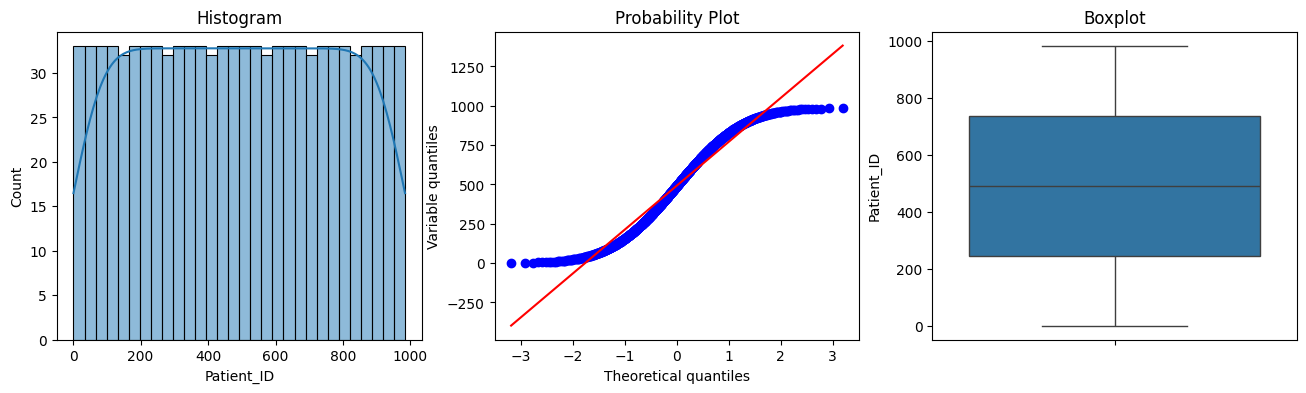

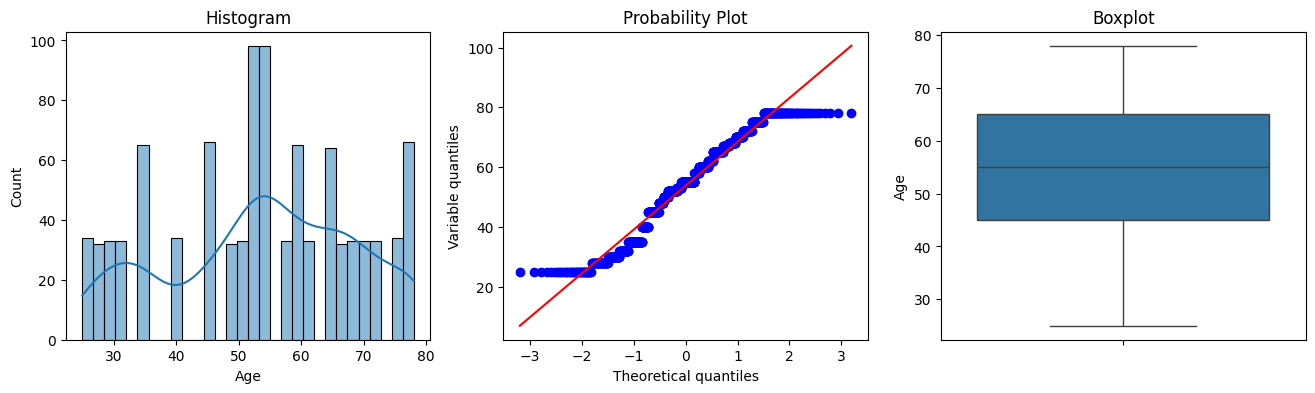

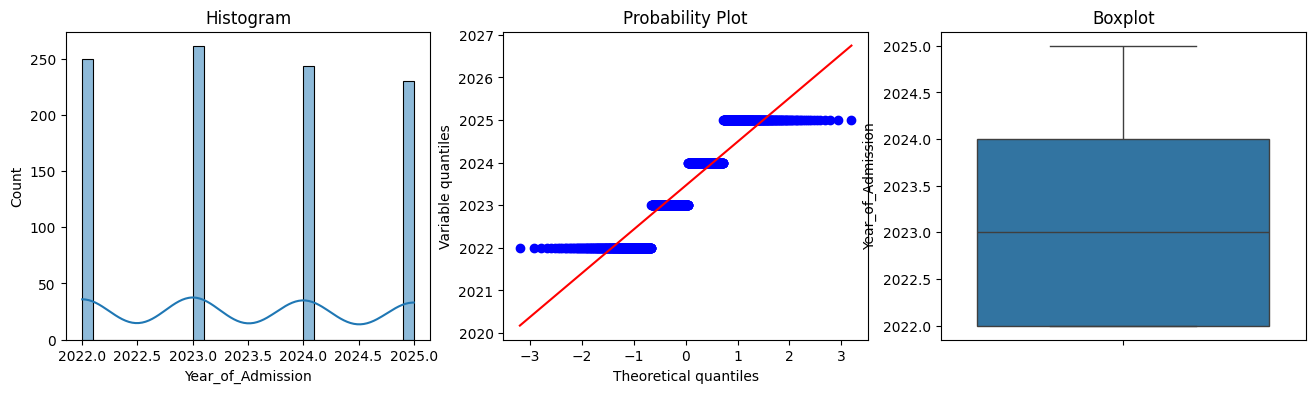

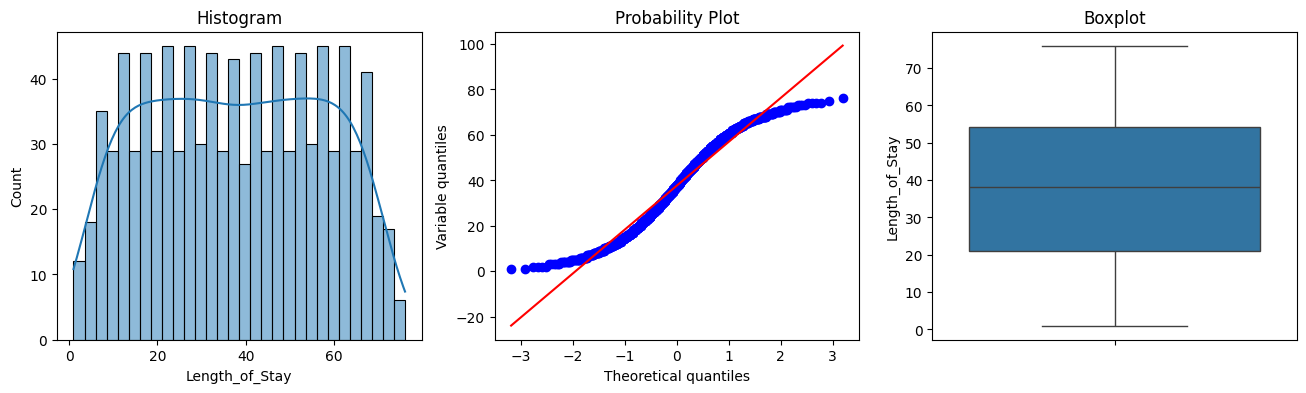

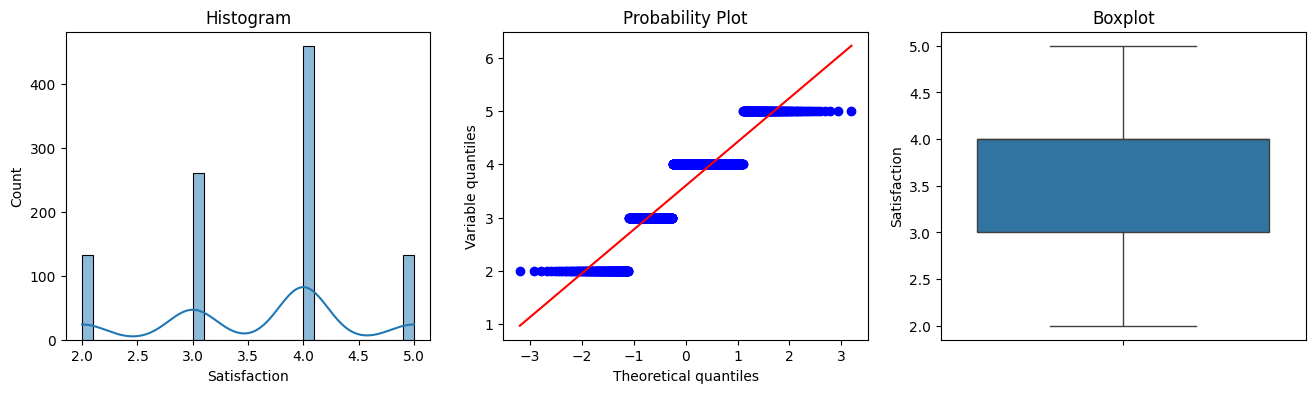

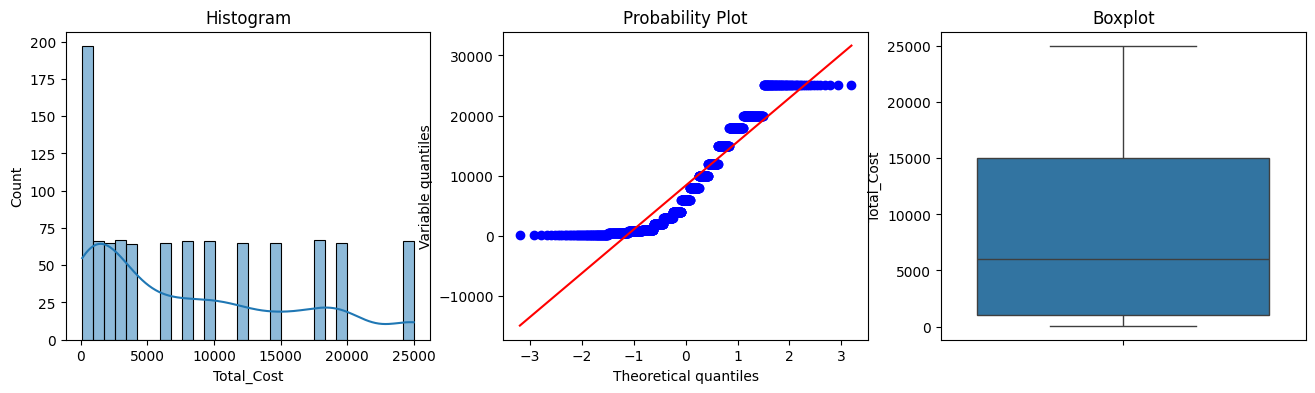

In [ ]:
# visualisasikan outlier hanya pada kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(df, col)

No Outlier data

## **Converting data types**

In [ ]:
#Mengubah admission date, discharge date type date

df['Admission_Date'] = pd.to_datetime(df['Admission_Date'], format='%d-%m-%Y')
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'], format='%d-%m-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient_ID         984 non-null    int64         
 1   Age                984 non-null    int64         
 2   Gender             984 non-null    object        
 3   Condition          984 non-null    object        
 4   Medication         984 non-null    object        
 5   Admission_Date     984 non-null    datetime64[ns]
 6   Discharge_Date     984 non-null    datetime64[ns]
 7   Patient_State      984 non-null    object        
 8   Year_of_Admission  984 non-null    int64         
 9   Length_of_Stay     984 non-null    int64         
 10  Readmission        984 non-null    object        
 11  Outcome            984 non-null    object        
 12  Satisfaction       984 non-null    int64         
 13  Insurance_Claimed  984 non-null    object        
 14  Total_Cost

# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Patient_ID,Age,Admission_Date,Discharge_Date,Year_of_Admission,Length_of_Stay,Satisfaction,Total_Cost
count,984.000000,984.000000,984,984,984.000000,984.000000,984.000000,984.000000
mean,492.500000,53.754065,2023-12-14 09:30:43.902438912,2024-01-21 01:26:20.487804928,2023.460366,37.663618,3.598577,8367.479675
min,1.000000,25.000000,2022-01-01 00:00:00,2022-01-11 00:00:00,2022.000000,1.000000,2.000000,100.000000
25%,246.750000,45.000000,2022-12-21 12:00:00,2023-02-07 18:00:00,2022.000000,21.000000,3.000000,1000.000000
50%,492.500000,55.000000,2023-12-08 12:00:00,2024-01-21 12:00:00,2023.000000,38.000000,4.000000,6000.000000
75%,738.250000,65.000000,2024-12-05 00:00:00,2025-01-10 12:00:00,2024.000000,54.250000,4.000000,15000.000000
max,984.000000,78.000000,2025-12-30 00:00:00,2026-02-25 00:00:00,2025.000000,76.000000,5.000000,25000.000000
std,284.200633,14.941135,NaN,NaN,1.106926,19.595805,0.883002,7761.990976


In [ ]:
df.describe(include='object')

,Gender,Condition,Medication,Patient_State,Readmission,Outcome,Insurance_Claimed
count,984,984,984,984,984,984,984
unique,2,15,15,30,2,2,2
top,Female,Fractured Leg,Cast and Physical Therapy,Kerala,No,Recovered,No
freq,524,67,67,120,720,591,633


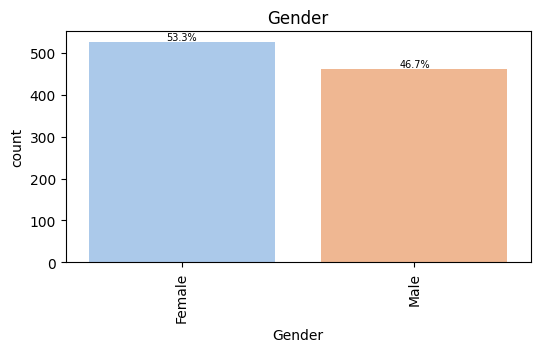

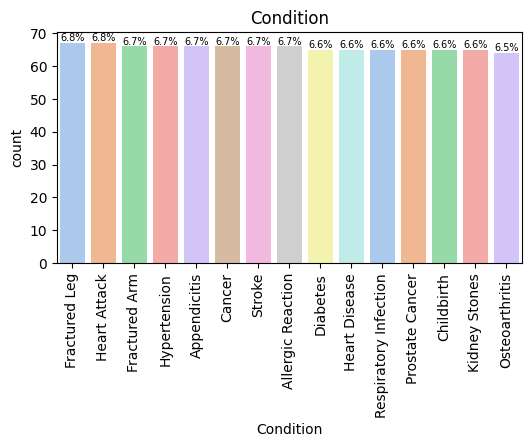

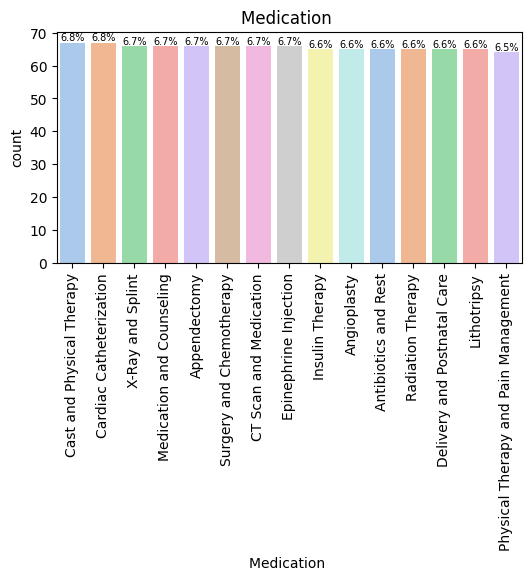

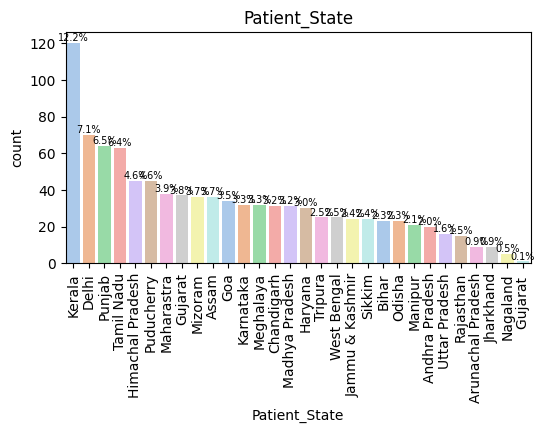

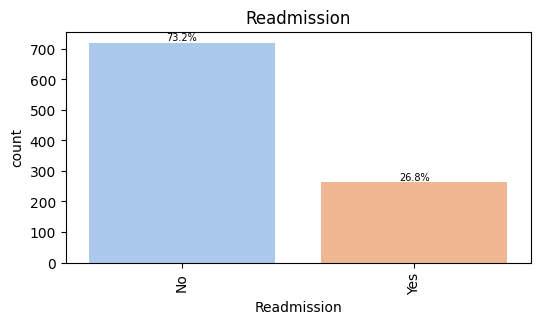

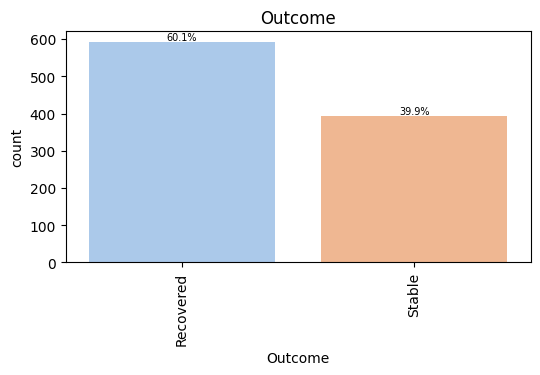

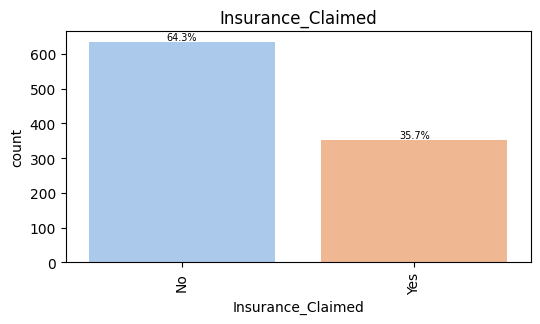

In [ ]:
kolom_kategorik = df.select_dtypes(include=['object']).columns
for col in kolom_kategorik:
    plt.figure(figsize=(6,3))
    #mengurutkan kategori berdasarkan presentase
    order = df[col].value_counts().index

    ax = sns.countplot(x=df[col],order=order, palette='pastel')
    plt.title(f'{col}')
    plt.xticks(rotation=90)

    total = len(df)

    for p in ax.patches:
        percent = 100 * p.get_height() / total
        ax.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=7, color='black')
    plt.show()

Rata-rata pasien yang melakukan perawatan didominasi oleh pasien perempuan sebanyak 53%. Pasien yang telah melakukan perawatan di RS sebanyak 60% sembuh dan 40% dalam kondisi stabil. Pasien dengan kondisi stabil kemungkinan bisa kembali lagi ke RS untuk readmission. Pasien readmission disebutkan bahwa terdapat sebanyak 26,8 %. Rata-rata pasien dirawat dengan membayar umum/tanpa asuransi dengan sebanyak 64,3%.

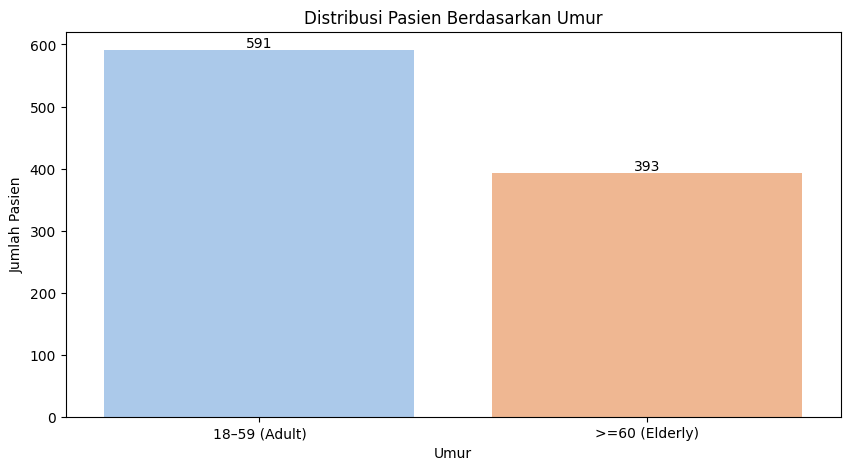

In [ ]:
#Distribusi umur
def categorize_age(age):
    if age <= 9:
        return "1–9 (Children)"
    elif age <= 18:
        return "10–18 (Youth)"
    elif age <= 59:
        return "18–59 (Adult)"
    else:
        return ">=60 (Elderly)"

df['Age_Group_WHO'] = df['Age'].apply(categorize_age)

plt.figure(figsize=(10, 5))
bar = sns.countplot(df, x='Age_Group_WHO', palette='pastel')

#label nilai
for container in bar.containers:
    bar.bar_label(container, fontsize=10, color='black')

plt.xlabel('Umur')
plt.ylabel('Jumlah Pasien')
plt.title('Distribusi Pasien Berdasarkan Umur')
plt.show()

Jumlah pasien dewasa mendominasi paling banyak dibandingkan dengan pasien lansia. Pasien remaja dan anak-anak tidak terdapat pada dataset ini kamungkinan karena jenis perawatan yang berbeda antara anak-anak dan dewasa

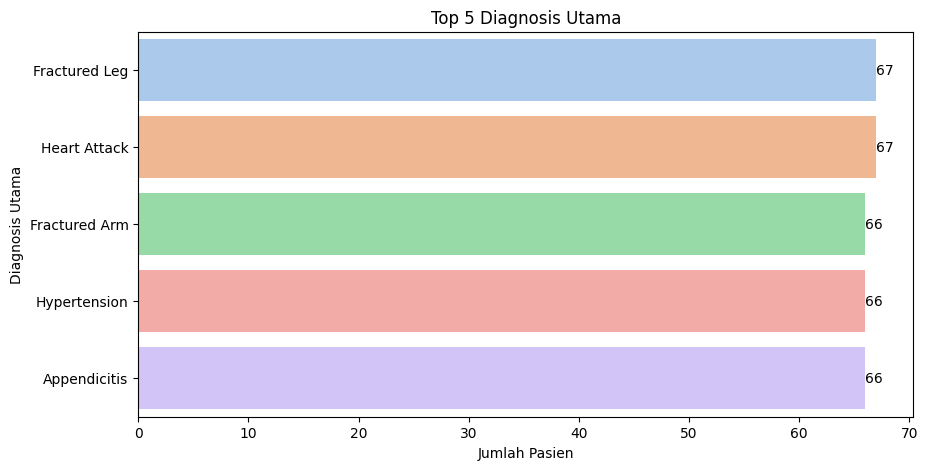

In [ ]:
# Top 5 diagnosis

plt.figure(figsize=(10, 5))
bar = sns.countplot(df, y='Condition', palette='pastel',
                    order=df['Condition'].value_counts().index[:5])

#label nilai
for container in bar.containers:
    bar.bar_label(container, fontsize=10, color='black')

plt.xlabel('Jumlah Pasien')
plt.ylabel('Diagnosis Utama')
plt.title('Top 5 Diagnosis Utama')
plt.show()

Pasien masuk Rumah sakit dengan diagnosis terbanyak yaitu, patah tulang pada kaki, Serangan jantung, patah tulang pada tangan, hipertensi dan usus buntu

Text(0.5, 1.0, 'Top 5 Obat/Terapi Utama')

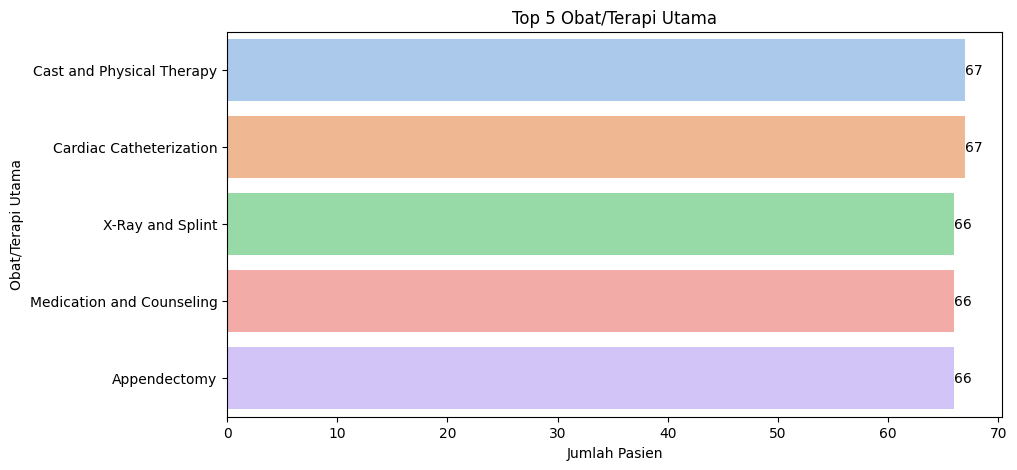

In [ ]:
#Top 5 Medication/Therapy

plt.figure(figsize=(10, 5))
bar = sns.countplot(df, y='Medication ', palette='pastel',
                    order=df['Medication '].value_counts().index[:5])

#Label Nilai
for container in bar.containers:
    bar.bar_label(container, fontsize=10, color='black')

plt.xlabel('Jumlah Pasien')
plt.ylabel('Obat/Terapi Utama')
plt.title('Top 5 Obat/Terapi Utama')

tindakan terbanyak meliputi pemasangan gips dan pysical terapi, katerisasi jantung, rontgen , pengobatan dan tindakan apendiktomi di kamar operasi. kondisi menyesuaikan dengan diagnosis yang diderita oleh pasien

In [ ]:
# Los per Age group

df_LOS= df.groupby('Age_Group_WHO')['Length_of_Stay'].mean().sort_values(ascending=False)
df_LOS

,Length_of_Stay
Age_Group_WHO,
>=60 (Elderly),38.491094
18–59 (Adult),37.113367


In [ ]:
# Los per Age group by median

df_LOS= df.groupby('Age_Group_WHO')['Length_of_Stay'].median().sort_values(ascending=False)
df_LOS

,Length_of_Stay
Age_Group_WHO,
>=60 (Elderly),38.0
18–59 (Adult),37.0


Length of Stay pasien lansia sedikit lebih tinggi dibandingkan pasien dewasa, akan tetapi tidak begitu ada selisih yang lumayan besar

In [ ]:
#Cost per Age group

df_cost= df.groupby('Age_Group_WHO')['Total_Cost'].mean().sort_values(ascending=False)
df_cost

,Total_Cost
Age_Group_WHO,
18–59 (Adult),8452.791878
>=60 (Elderly),8239.185751


In [ ]:
#Cost per Age group

df_cost= df.groupby('Age_Group_WHO')['Total_Cost'].median().sort_values(ascending=False)
df_cost

,Total_Cost
Age_Group_WHO,
>=60 (Elderly),8000.0
18–59 (Adult),6000.0


In [ ]:
#Satisfaction per Age group

df_satisfaction= df.groupby('Age_Group_WHO')['Satisfaction'].mean().sort_values(ascending=False)
df_satisfaction

,Satisfaction
Age_Group_WHO,
18–59 (Adult),3.947547
>=60 (Elderly),3.073791


In [ ]:
#Satisfaction per Age group

df_satisfaction= df.groupby('Age_Group_WHO')['Satisfaction'].median().sort_values(ascending=False)
df_satisfaction

,Satisfaction
Age_Group_WHO,
18–59 (Adult),4.0
>=60 (Elderly),3.0


Tingkat kepuasan pasien dewasa lebih tinggi dibandingkan dengan pasien lansia

In [ ]:
#Satisfaction per total cost

df_satisfaction= df.groupby('Satisfaction')['Total_Cost'].mean().sort_values(ascending=False)
df_satisfaction

,Total_Cost
Satisfaction,
2,14030.075188
3,10639.846743
4,7753.275109
5,300.000000


In [ ]:
#Satisfaction per total cost

df_satisfaction= df.groupby('Satisfaction')['Total_Cost'].median().sort_values(ascending=False)
df_satisfaction

,Total_Cost
Satisfaction,
2,18000.0
3,8000.0
4,3000.0
5,300.0


Biaya perawatan pasien yang mahal membuat pasien tidak puas akan pelayanan perawatan yang telah diberikan

<Axes: >

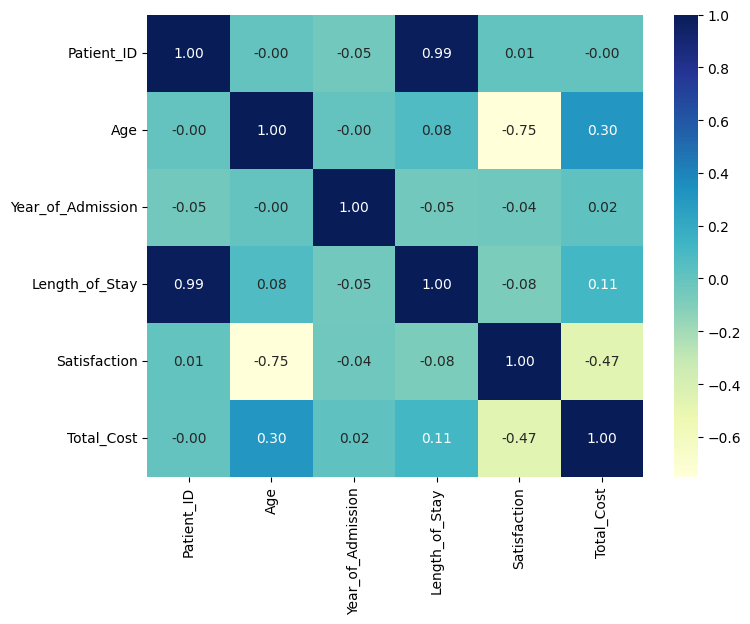

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='YlGnBu')

Hasil uji korelasi menggunakan heatmap menunjukkan ada hubungan antara umur dan kepuasan pasien, selain itu juga ada hubungan cukup erat antara kepuasan dengan biaya total perawatan. Kondis yang lain yaitu ada hubungan lemah antara umur dengan biaya perawatan.

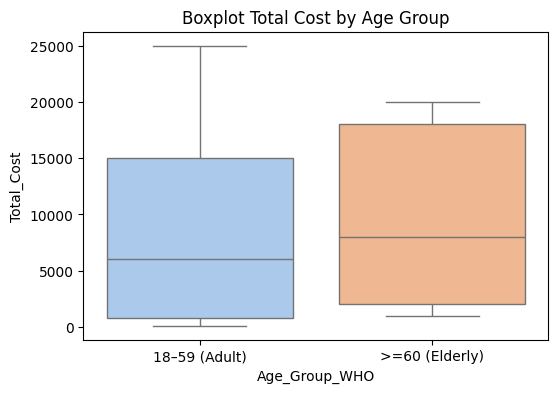

In [ ]:
#boxplot total cost dengan Age Group

plt.figure(figsize=(6,4))
sns.boxplot(x='Age_Group_WHO', y='Total_Cost', data=df, palette='pastel')
plt.title('Boxplot Total Cost by Age Group')
plt.show()

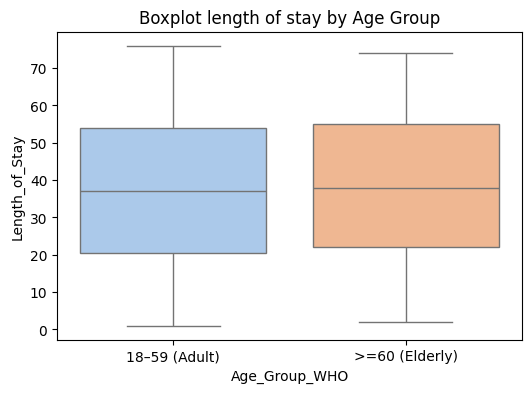

In [ ]:
#boxplot length of stay by Age Group WHO

plt.figure(figsize=(6,4))
sns.boxplot(x='Age_Group_WHO', y='Length_of_Stay', data=df, palette='pastel')
plt.title('Boxplot length of stay by Age Group')
plt.show()

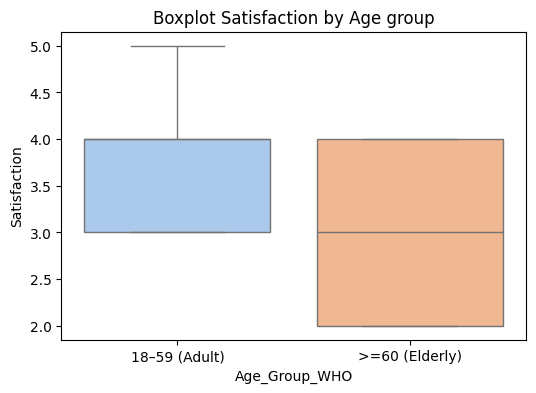

In [ ]:
#boxplot Satisfaction by Age group

plt.figure(figsize=(6,4))
sns.boxplot(x='Age_Group_WHO', y='Satisfaction', data=df, palette='pastel')
plt.title('Boxplot Satisfaction by Age group')
plt.show()

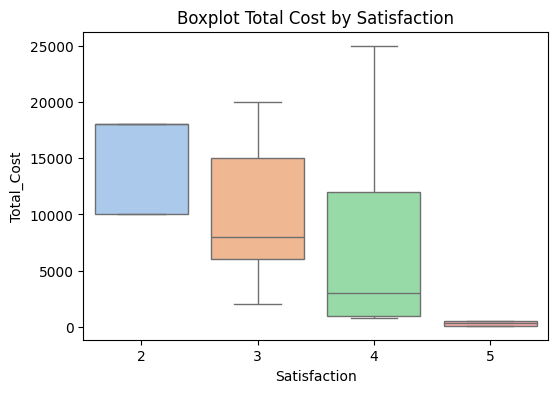

In [ ]:
#boxplot total cost dengan satisfaction

plt.figure(figsize=(6,4))
sns.boxplot(x='Satisfaction', y='Total_Cost', data=df, palette='pastel')
plt.title('Boxplot Total Cost by Satisfaction')
plt.show()

# **Comparative Analysis**

**Length of Stay**

- H0: There is no significant difference in the average length of stay (LOS) between adult and elderly patients.
- H1: There is a significant difference in the average length of stay (LOS) between adult and elderly patients.

**Total Cost**
- H0: There is no significant difference in the average total treatment costs between adult and elderly patients.
- H1: There is a significant difference in the average total treatment costs between adult and elderly patients.

**Patient Satisfaction Rating**
- H0: There is no significant difference in patient satisfaction ratings between adult and elderly patients.
- H1: There is a significant difference in patient satisfaction ratings between adult and elderly patients.




## **Uji Normalitas**

In [ ]:
#Uji Normalitas

normalitas_LOS = stats.shapiro(df['Length_of_Stay'])
normalitas_cost = stats.shapiro(df['Total_Cost'])
normalitas_satisfaction = stats.shapiro(df['Satisfaction'])
normalitas_age = stats.shapiro(df['Age'])

print(f'p-value LOS: {normalitas_LOS.pvalue:.2f}')
print(f'p-value cost: {normalitas_cost.pvalue:.2f}')
print(f'p-value satisfaction: {normalitas_satisfaction.pvalue:.2f}')
print(f'p-value age: {normalitas_age.pvalue:.2f}')

p-value LOS: 0.00
p-value cost: 0.00
p-value satisfaction: 0.00
p-value age: 0.00


Hasil Uji menunjukkan data tidak normal, pengujian hipotesis akan dilakukan dengan uji non parametrik

## **Uji Homogenitas**

In [ ]:
# Uji homogenitas Levene LOS by Age_Group_WHO

levene_LOS = stats.levene(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Length_of_Stay'],
                          df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Length_of_Stay'])

print(f'p-value: {levene_LOS.pvalue:.2f}')

p-value: 0.78


In [ ]:
#uji homogenitas levene Total Cost by Age_Group_WHO

levene_cost = stats.levene(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Total_Cost'],
                          df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Total_Cost'])

print(f'p-value: {levene_cost.pvalue:.2f}')

p-value: 0.00


In [ ]:
# Uji Homogenitas Satisfaction by Age group

levene_satisfaction = stats.levene(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Satisfaction'],
                                   df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Satisfaction'])

print(f'p-value: {levene_satisfaction.pvalue:.2f}')

p-value: 0.00


In [ ]:
#uji homogenitas levene Total Cost by Satisfaction

levene_satisfaction = stats.levene(df[df['Satisfaction'] == 2]['Total_Cost'],
                                   df[df['Satisfaction'] == 3]['Total_Cost'],
                                   df[df['Satisfaction'] == 4]['Total_Cost'],
                                   df[df['Satisfaction'] == 5]['Total_Cost'])

print(f'p-value: {levene_satisfaction.pvalue:.2f}')

p-value: 0.00


## **Uji Hipotesis**

In [ ]:
#uji man-whitney u LOS by Age_Group_WHO

stat, p = stats.mannwhitneyu(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Length_of_Stay'],
                   df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Length_of_Stay'])

print(f'p-value: {p:.2f}')

p-value: 0.29


Tidak terdapat perbedaan signifikan antara LOS dengan Age Group

In [ ]:
#uji man-whitney u total cost by Age_Group_WHO

stat, p = stats.mannwhitneyu(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Total_Cost'],
                   df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Total_Cost'])

print(f'p-value: {p:.2f}')

p-value: 0.01


Terdapat perbedaan signifikan antara total cost dengan age group

In [ ]:
#uji man-whitney u satifaction by age Group

stat, p = stats.mannwhitneyu(df[df['Age_Group_WHO'] == '18–59 (Adult)']['Satisfaction'],
                             df[df['Age_Group_WHO'] == '>=60 (Elderly)']['Satisfaction'])

print(f'p-value: {p:.2f}')

p-value: 0.00


Terdapat perbedaan Signifikan antara Tingkat kepuasan dengan Age Group

In [ ]:
#Uji Kruskall satisfaction total cost
from scipy.stats import kruskal

stats, p = kruskal(df.loc[df['Satisfaction'] == 2, 'Total_Cost'].values,
                   df.loc[df['Satisfaction'] == 3, 'Total_Cost'].values,
                   df.loc[df['Satisfaction'] == 4, 'Total_Cost'].values,
                   df.loc[df['Satisfaction'] == 5, 'Total_Cost'].values)

print(f'p-value: {p:.2f}')

p-value: 0.00


The Kruskal–Wallis test demonstrated a significant overall difference in total costs across satisfaction (p < 0.05).

In [ ]:
!pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp

posthoc = sp.posthoc_dunn(df, val_col='Total_Cost', group_col='Satisfaction')

print(posthoc)

              2             3             4             5
2  1.000000e+00  4.122638e-04  2.235263e-18  4.364392e-79
3  4.122638e-04  1.000000e+00  3.993178e-10  1.647906e-73
4  2.235263e-18  3.993178e-10  1.000000e+00  6.650764e-49
5  4.364392e-79  1.647906e-73  6.650764e-49  1.000000e+00


In [ ]:
print(posthoc <0.05)

       2      3      4      5
2  False   True   True   True
3   True  False   True   True
4   True   True  False   True
5   True   True   True  False


Post hoc Dunn’s test revealed that all satisfaction groups differed significantly from each other.

# **Customer Satisfaction Score**

In [ ]:
# Overall CSAT

max_rating = 5
n_data = (df['Patient_ID'].count() * max_rating)

CSAT_Score = df['Satisfaction'].sum() / n_data
print(f'CSAT Score: {CSAT_Score*100:.2f}%')

CSAT Score: 71.97%
